In [2]:
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import pandas as pd

In [3]:
df = pd.read_pickle('./Internet_datasets/Conectividad_servicio_Internet.pickle')

In [7]:
keys = ['ADSL','CABLEMODEM','DIALUP','FIBRAOPTICA','SATELITAL','WIRELESS','TELEFONIAFIJA','3G','4G']

In [8]:
porcentaje_si = lambda x: (x == 'SI').sum() / x.count() * 100

In [9]:
df_porcentaje_SI = df.groupby('Provincia').agg({'ADSL': porcentaje_si,
                                                    'CABLEMODEM': porcentaje_si,
                                                    'DIALUP': porcentaje_si,
                                                    'FIBRAOPTICA': porcentaje_si,
                                                    'SATELITAL': porcentaje_si,
                                                    'WIRELESS': porcentaje_si,
                                                    'TELEFONIAFIJA': porcentaje_si,
                                                    '3G': porcentaje_si,
                                                    '4G': porcentaje_si})
df_porcentaje_SI = df_porcentaje_SI.reset_index()
df_porcentaje_SI

,Provincia,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G
0,BUENOS AIRES,39.400666,38.290788,23.640400,49.167592,17.425083,55.160932,60.821310,65.482797,72.697003
1,CABA,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,CATAMARCA,3.846154,1.648352,0.549451,12.637363,26.373626,18.131868,17.032967,15.934066,31.318681
3,CHACO,30.434783,15.217391,1.086957,48.913043,46.739130,50.000000,51.086957,47.826087,81.521739
4,CHUBUT,14.444444,12.222222,16.666667,14.444444,54.444444,34.444444,60.000000,34.444444,42.222222
5,CORDOBA,32.553957,16.007194,0.899281,30.935252,13.129496,52.517986,55.755396,49.820144,61.870504
6,CORRIENTES,26.923077,11.538462,1.282051,15.384615,70.512821,57.692308,65.384615,50.000000,89.743590
7,ENTRE RIOS,24.226804,20.103093,2.061856,22.680412,11.340206,67.010309,65.979381,40.206186,65.979381
8,FORMOSA,20.634921,4.761905,0.000000,25.396825,36.507937,93.650794,47.619048,25.396825,66.666667
9,JUJUY,12.500000,9.375000,0.000000,27.500000,27.500000,24.375000,22.500000,17.500000,28.125000


C:\Users\guill\AppData\Local\Temp\ipykernel_9060\1551527231.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax =  sns.barplot(x='Provincia', y='Porcentaje', hue='Tipo de Conexión', data=df_melted, ci=None)


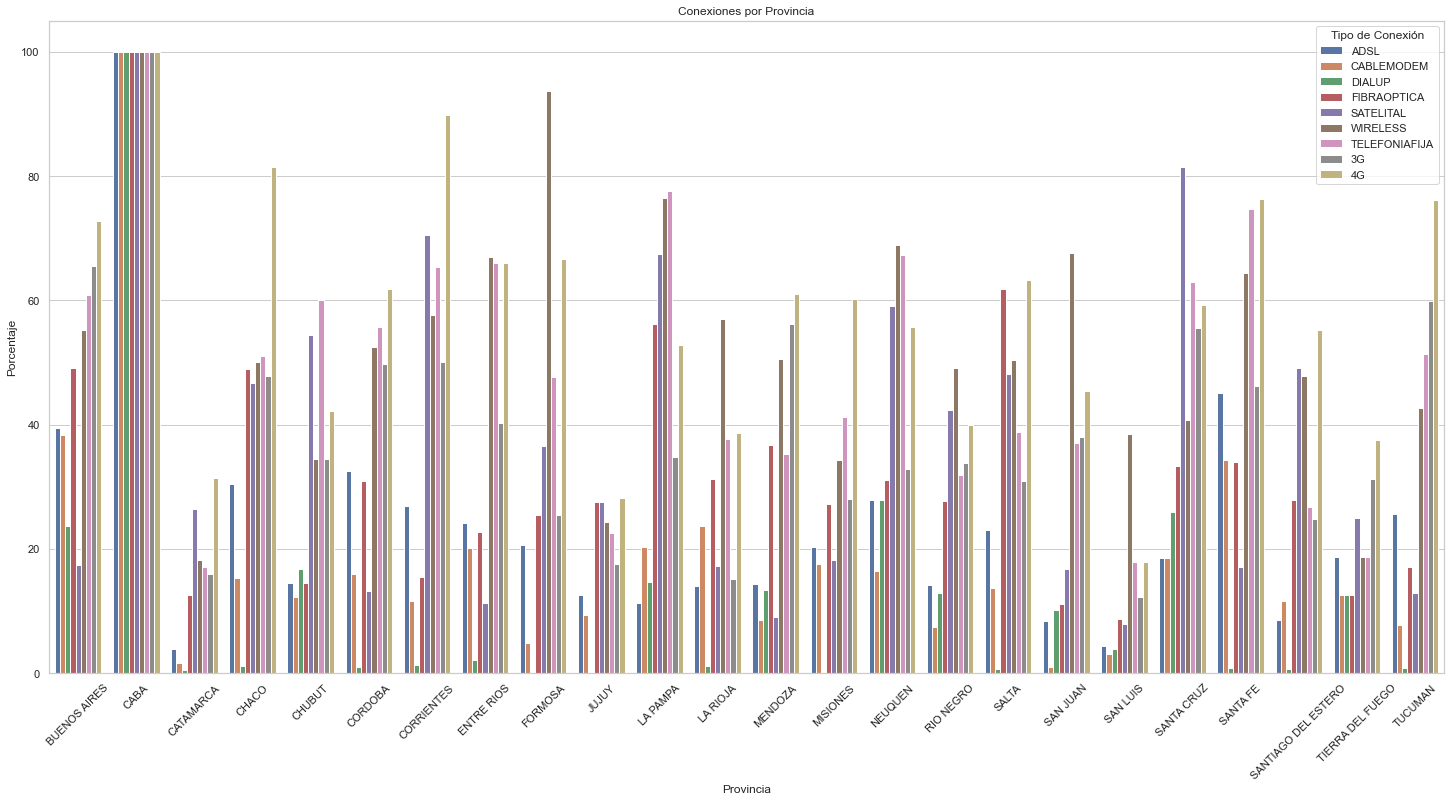

In [10]:
# Derrite el DataFrame para obtener una columna "Tipo de Conexión" y una columna "Porcentaje"
df_melted = df_porcentaje_SI.melt(id_vars='Provincia', var_name='Tipo de Conexión', value_name='Porcentaje')

# Configura el estilo de Seaborn
sns.set(style='whitegrid')

# Aumenta el tamaño del gráfico
plt.figure(figsize=(25, 12))  # Puedes ajustar el tamaño según tus necesidades

# Crea el gráfico de barras
ax =  sns.barplot(x='Provincia', y='Porcentaje', hue='Tipo de Conexión', data=df_melted, ci=None)

# Ajusta los ejes y el título
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.title('Conexiones por Provincia')

# Rotar etiquetas del eje x a 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Muestra el gráfico
plt.show()